# UFV QC 04 Lab - Bernstein-Vazirani 

### Objective
We now want to understand the Bernstein-Vazirani Algorithm.
We will see the following:

0. Math explanation
1. Building an Oracle
1. Building an Oracle with a function
2. Bernstein-Vazirani Algorithm

# 0. Math for the Bernstein-Vazirani Algorithm

In this section, we first introduce the Bernstein-Vazirani problem, its classical solution, and the quantum algorithm to solve it. We then implement the quantum algorithm using Qiskit and run it on both a simulator and a device.


The Bernstein-Vazirani algorithm, first introduced in Reference [1], can be seen as an extension of the Deutsch-Jozsa algorithm we covered in the last section. It showed that there can be advantages in using a quantum computer as a computational tool for more complex problems than the Deutsch-Jozsa problem.

### 1.1 The Bernstein-Vazirani Problem <a id='bvproblem'> </a>

We are again given a black-box function $f$, which takes as input a string of bits ($x$), and returns either $0$ or $1$, that is:
$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ where } x_n \textrm{ is }0 \textrm{ or } 1  $$ 

Instead of the function being balanced or constant as in the Deutsch-Jozsa problem, now the function is guaranteed to return the bitwise product of the input with some string, $s$. In other words, given an input $x$, $f(x) = s \cdot x \, \text{(mod 2)}$. We are expected to find $s$. As a classical reversible circuit, the Bernstein-Vazirani oracle looks like this:
    
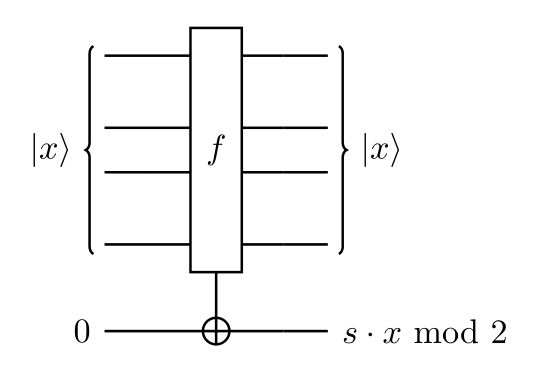



### 1.2 The Classical Solution <a id='classical-solution'> </a>

Classically, the oracle returns:
$$f_s(x) = s \cdot x \mod 2$$ 
given an input $x$. Thus, the hidden bit string $s$ can be revealed by querying the oracle with the sequence of inputs:

|Input(x)|
|:-----:|
|100...0|
|010...0|
|001...0|
|000...1|

Where each query reveals a different bit of $s$ (the bit $s_i$). For example, with `x = 1000...0` one can obtain the least significant bit of $s$, with `x = 0100...0` we can find the next least significant, and so on. This means we would need to call the function $f_s(x)$, $n$ times. 

### 1.3 The Quantum Solution <a id='quantum-solution'> </a>

Using a quantum computer, we can solve this problem with 100% confidence after only one call to the function $f(x)$. The quantum Bernstein-Vazirani algorithm to find the hidden bit string is very simple: 

1. Initialize the inputs qubits to the $|0\rangle^{\otimes n}$ state, and output qubit to $|{-}\rangle$.
2. Apply Hadamard gates to the input register
3. Query the oracle
4. Apply Hadamard gates to the input register
5. Measure

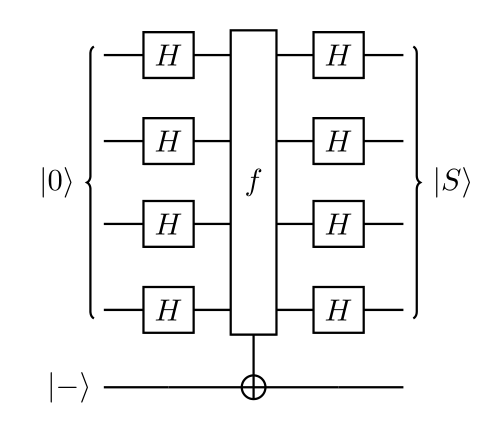

To explain the algorithm, let’s look more closely at what happens when we apply a H-gate to each qubit. If we have an $n$-qubit state, $|a\rangle$, and apply the H-gates, we will see the transformation:

$$
|a\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle.
$$



<details>
    <summary>Explain Equation (Click to Expand)</summary>
We remember the Hadamard performs the following transformations on one qubit:

$$
H|0\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
$$ $$
H|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

Using summation notation, we could rewrite it like this:

$$
H|a\rangle = \frac{1}{\sqrt{2}}\sum_{x\in \{0,1\}} (-1)^{a\cdot x}|x\rangle.
$$

For two qubits, applying a Hadamard to each performs the following transformations:

$$
H^{\otimes 2}|00\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)
$$ $$
H^{\otimes 2}|01\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle + |10\rangle - |11\rangle)
$$ $$
H^{\otimes 2}|10\rangle = \tfrac{1}{2}(|00\rangle + |01\rangle - |10\rangle - |11\rangle)
$$ $$
H^{\otimes 2}|11\rangle = \tfrac{1}{2}(|00\rangle - |01\rangle - |10\rangle + |11\rangle)
$$

We can express this using the summation below:

$$
H^{\otimes 2}|a\rangle = \frac{1}{2}\sum_{x\in \{0,1\}^2} (-1)^{a\cdot x}|x\rangle
$$

You will hopefully now see how we arrive at the equation above.
</details>

In particular, when we start with a quantum register $|00\dots 0\rangle$ and apply $n$ Hadamard gates to it, we have the familiar quantum superposition:

$$
|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle
$$

In this case, the phase term $(-1)^{a\cdot x}$ disappears, since $a=0$, and thus $(-1)^{a\cdot x} = 1$. 

The classical oracle $f_s$ returns $1$ for any input $x$ such that $s \cdot x\mod 2 = 1$, and returns $0$ otherwise. If we use the same phase kickback trick from the Deutsch-Jozsa algorithm and act on a qubit in the state $|{-}\rangle$, we get the following transformation:

$$
|x \rangle \xrightarrow{f_s} (-1)^{s\cdot x} |x \rangle 
$$

The algorithm to reveal the hidden bit string follows naturally by querying the quantum oracle $f_s$ with the quantum superposition obtained from the Hadamard transformation of $|00\dots 0\rangle$. Namely,

$$
|00\dots 0\rangle \xrightarrow{H^{\otimes n}} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x\rangle \xrightarrow{f_a} \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle
$$

Because the inverse of the $n$ Hadamard gates is again the $n$ Hadamard gates, we can obtain $a$ by

$$
\frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} (-1)^{a\cdot x}|x\rangle \xrightarrow{H^{\otimes n}} |a\rangle
$$

## 2. Example  <a id='example'></a>

Let's go through a specific example for $n=2$ qubits and a secret string $s=11$. Note that we are following the formulation in Reference [2] that generates a circuit for the Bernstein-Vazirani quantum oracle using only one register. 

<ol>
    <li> The register of two qubits is initialized to zero:
    

$$\lvert \psi_0 \rangle = \lvert 0 0 \rangle$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_1 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle + \lvert 0 1 \rangle + \lvert 1 0 \rangle + \lvert 1 1 \rangle \right) $$

 
   </li>

   <li> For the string $s=11$, the quantum oracle performs the operation:
$$
|x \rangle \xrightarrow{f_s} (-1)^{x\cdot 11} |x \rangle. 
$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( (-1)^{00\cdot 11}|00\rangle + (-1)^{01\cdot 11}|01\rangle + (-1)^{10\cdot 11}|10\rangle + (-1)^{11\cdot 11}|11\rangle \right)$$

$$\lvert \psi_2 \rangle = \frac{1}{2} \left( \lvert 0 0 \rangle - \lvert 0 1 \rangle - \lvert 1 0 \rangle + \lvert 1 1 \rangle \right)$$

 
   </li>

   <li> Apply a Hadamard gate to both qubits:
    

$$\lvert \psi_3 \rangle = \lvert 1 1 \rangle$$

 
   </li>

   <li> Measure to find the secret string $s=11$
   </li>


</ol>


# 1. Building an Oracle
We have already seen in the blackboard how we built the Oracle for the Bernstein-Vazirani algorithm, let's now do it in qiskit.

The first objective, is building a simple oracle by hand with the following conditions:
- The length of the input is 5 bits/qubits
- We need an extra bit/qubit to xor the output to
- This oracle will have as a secret number: `01010` 

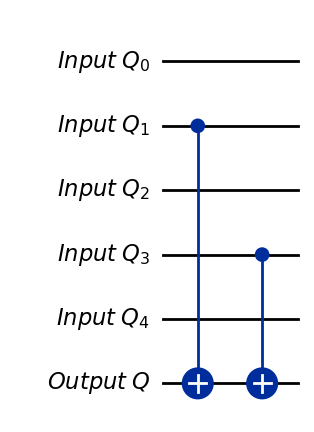

In [13]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

####### Your code here
input_q = QuantumRegister(5,"Input Q")
output_q = QuantumRegister(1, "Output Q")

qc = QuantumCircuit(input_q, output_q)

qc.cx(1,5)
qc.cx(3,5)

qc.draw('mpl')
######################

# 2. Building an Oracle with a function
Now, we want to be able to create oracles based on whatever number we are given with python.

We can use the `bin(x)` function in python to convert a number to binary, and the representation will be something akin to `0b010101`. 
We can convert this into a string, and use it to iterate over it.

In [6]:
# Fill in the function that gives us an oracle as an instruction

def oracle_generator(secret_number: list): # ejemplo input: (0,1,0,1,1,0)
    
    ###### Your code here
    n = len(secret_number)
    input_q = QuantumRegister(n,"Input Q")
    output_q = QuantumRegister(1, "Output Q")

    qc = QuantumCircuit(input_q, output_q)
    
    for i in range(n):
        if secret_number[i]:
            qc.cx(i,n)
    
    qc.draw('mpl')
    
    
    
    ######

    return qc.to_instruction

oracle_generator([0,1,0])

<bound method QuantumCircuit.to_instruction of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f3083584940>>

# 3. The Bernstein-Vazirani Algorithm
Now, let's implement the problem and the solution.
Let's do everything from scratch for the secret number: `10101`

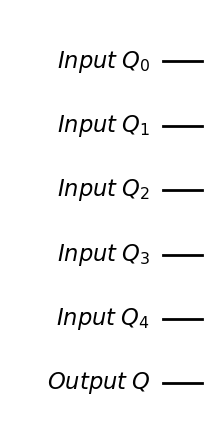

In [14]:
# Create the circuits and initialize the qubits to a uniform superposition (except the output qubit)
input_q = QuantumRegister(5,"Input Q")
output_q = QuantumRegister(1, "Output Q")

bits= ClassicalRegister(5)

qc = QuantumCircuit(input_q, output_q)

qc.draw('mpl')

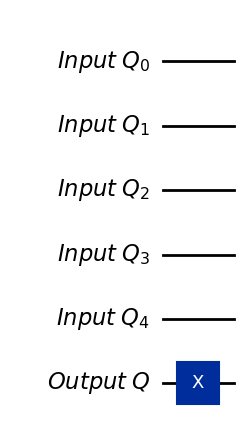

In [15]:
# Implement an oracle for the number `10101`
qc.x(output_q)

qc.draw('mpl')


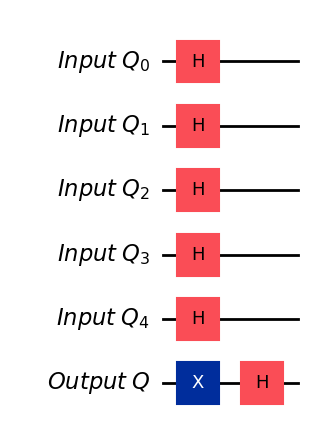

In [16]:
# Apply the last hadamards and measurements
qc.h(input_q)
qc.h(output_q)

qc.draw('mpl')


## 3.1 Running the circuit in a simulator

By now you should know the drill, 4 steps:
1. Connecting to the IBM Runtime Service
2. Choosing a Backend
3. Creating a Session
4. Running your circuit in a Sampler Primitive

Then, display the results

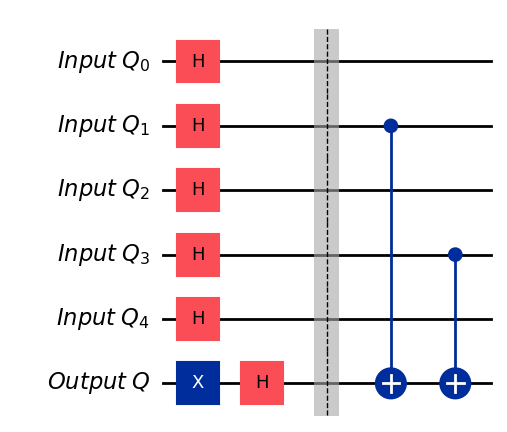

In [17]:
# Run your circuit
qc.barrier(range(6))


qc.cx(1,5)
qc.cx(3,5)

qc.draw('mpl')


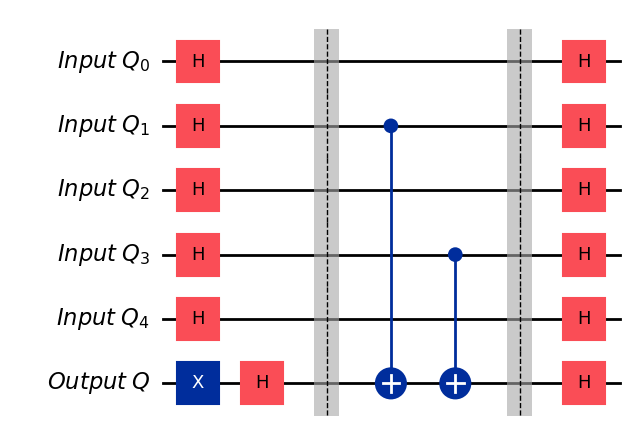

In [18]:
# Apply the last hadamards and measurements
qc.barrier(range(6))
qc.h(input_q)
qc.h(output_q)

qc.draw('mpl')

# 4. Re-do the same setup, but for the `11100` secret message - HOMEWORK

In [ ]:
###### Your code here




######